<a href="https://colab.research.google.com/github/SATYA1962S/digit_1/blob/main/%F0%9F%9B%A1%EF%B8%8F_Landslide_Detection_Using_CNN_%F0%9F%9B%A1%EF%B8%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gauravduttakiit_classification_for_landslide_detection_path = kagglehub.dataset_download('gauravduttakiit/classification-for-landslide-detection')

print('Data source import complete.')


100%|██████████| 3.36G/3.36G [00:37<00:00, 97.5MB/s]

Extracting files...


Data source import complete.


In [2]:
"""
🌍 Landslide Detection - Exploratory Analysis & Modeling
--------------------------------------------------------

This notebook focuses on building a classification model to detect landslides
using multi-source satellite imagery (Sentinel-1 SAR and Sentinel-2 optical data).

Each data sample is a 64x64x12 image patch containing optical and SAR bands.
The goal is to accurately classify whether a given region has been affected by
a landslide or not.

Key Steps:
- Loading and visualizing multi-channel satellite image data
- Exploring label distribution (class imbalance)
- Training a CNN-based classifier using PyTorch
- Evaluating model performance with classification metrics

Data Source:
- Preprocessed .npy image patches
- Labels in train.csv (ID, label)

Libraries Used:
- NumPy & Pandas for data handling
- Matplotlib & Seaborn for basic visualizations
- PyTorch for model training
"""

# 📦 Import Required Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch for deep learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Sklearn for metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# ⚠️ Suppress warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# 🎨 Seaborn plot theme
sns.set_theme(style="whitegrid")

In [12]:
# Correct sample path using downloaded kagglehub path
sample_path = f'{gauravduttakiit_classification_for_landslide_detection_path}/train_data'

# Load one file to check shape
print(sample_path)
import os

print(os.listdir(sample_path))
file_name = 'VALID_FILENAME_FROM_LIST.npy'  # Replace with actual file







/root/.cache/kagglehub/datasets/gauravduttakiit/classification-for-landslide-detection/versions/2/train_data
['train_data']


In [14]:
import os
print(os.listdir(sample_path))



['train_data']


In [15]:
sample_path = f'{gauravduttakiit_classification_for_landslide_detection_path}/train_data/train_data'


In [16]:
# Load one file to check shape
print(sample_path)
import os

print(os.listdir(sample_path))
file_name = 'VALID_FILENAME_FROM_LIST.npy'

/root/.cache/kagglehub/datasets/gauravduttakiit/classification-for-landslide-detection/versions/2/train_data/train_data
['ID_OOV0MN.npy', 'ID_CBYRV5.npy', 'ID_LXKOY8.npy', 'ID_B0CSTM.npy', 'ID_RKYJ35.npy', 'ID_AU5AAW.npy', 'ID_FMFVSZ.npy', 'ID_6ICOJE.npy', 'ID_0B97LT.npy', 'ID_1VFNOH.npy', 'ID_8FRZ7L.npy', 'ID_Q8CNMV.npy', 'ID_2F7AHZ.npy', 'ID_BI810F.npy', 'ID_3BXKUS.npy', 'ID_AT4H2S.npy', 'ID_YG1LC4.npy', 'ID_48ONHS.npy', 'ID_JIHWW1.npy', 'ID_BUGX1B.npy', 'ID_I7PABD.npy', 'ID_6W9DXP.npy', 'ID_QOOV4U.npy', 'ID_0YO03C.npy', 'ID_06FYFF.npy', 'ID_0R37RL.npy', 'ID_IQSYAO.npy', 'ID_2LVIUV.npy', 'ID_Q2I36L.npy', 'ID_JIGN7R.npy', 'ID_XGII9X.npy', 'ID_K65BJB.npy', 'ID_TY8YAF.npy', 'ID_86LWQF.npy', 'ID_2PW1U5.npy', 'ID_MWUI2Q.npy', 'ID_DKGFB0.npy', 'ID_WR104C.npy', 'ID_8VEILP.npy', 'ID_VR3TS0.npy', 'ID_QJGJ6B.npy', 'ID_WC46TI.npy', 'ID_CW6JON.npy', 'ID_BP51YU.npy', 'ID_17TKDL.npy', 'ID_SVSSTO.npy', 'ID_CSKQ7B.npy', 'ID_MHKD6D.npy', 'ID_CN9YJJ.npy', 'ID_6R911Y.npy', 'ID_6WDWS6.npy', 'ID_G89R7I.n

In [17]:
import os
print(os.listdir(sample_path))

['ID_OOV0MN.npy', 'ID_CBYRV5.npy', 'ID_LXKOY8.npy', 'ID_B0CSTM.npy', 'ID_RKYJ35.npy', 'ID_AU5AAW.npy', 'ID_FMFVSZ.npy', 'ID_6ICOJE.npy', 'ID_0B97LT.npy', 'ID_1VFNOH.npy', 'ID_8FRZ7L.npy', 'ID_Q8CNMV.npy', 'ID_2F7AHZ.npy', 'ID_BI810F.npy', 'ID_3BXKUS.npy', 'ID_AT4H2S.npy', 'ID_YG1LC4.npy', 'ID_48ONHS.npy', 'ID_JIHWW1.npy', 'ID_BUGX1B.npy', 'ID_I7PABD.npy', 'ID_6W9DXP.npy', 'ID_QOOV4U.npy', 'ID_0YO03C.npy', 'ID_06FYFF.npy', 'ID_0R37RL.npy', 'ID_IQSYAO.npy', 'ID_2LVIUV.npy', 'ID_Q2I36L.npy', 'ID_JIGN7R.npy', 'ID_XGII9X.npy', 'ID_K65BJB.npy', 'ID_TY8YAF.npy', 'ID_86LWQF.npy', 'ID_2PW1U5.npy', 'ID_MWUI2Q.npy', 'ID_DKGFB0.npy', 'ID_WR104C.npy', 'ID_8VEILP.npy', 'ID_VR3TS0.npy', 'ID_QJGJ6B.npy', 'ID_WC46TI.npy', 'ID_CW6JON.npy', 'ID_BP51YU.npy', 'ID_17TKDL.npy', 'ID_SVSSTO.npy', 'ID_CSKQ7B.npy', 'ID_MHKD6D.npy', 'ID_CN9YJJ.npy', 'ID_6R911Y.npy', 'ID_6WDWS6.npy', 'ID_G89R7I.npy', 'ID_OARV3X.npy', 'ID_DBVWNT.npy', 'ID_8NQ8MY.npy', 'ID_EF69SH.npy', 'ID_UV9G6K.npy', 'ID_WJK1BQ.npy', 'ID_O5TUZQ.np

In [ ]:
file_name = 'ID_XXXX.npy'  # Replace with a real file from the list
print(np.load(os.path.join(sample_path, file_name)).shape)


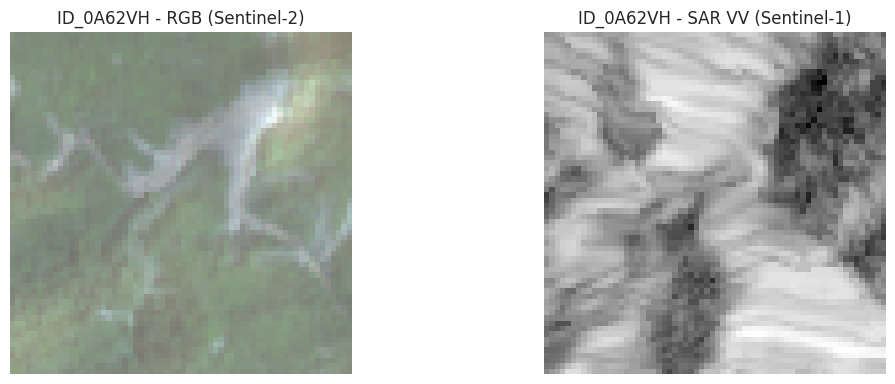

In [18]:
def plot_sample(id_):
    # Load the (64, 64, 12) image and transpose to (12, 64, 64)
    arr = np.load(f'{sample_path}/{id_}.npy')
    arr = np.transpose(arr, (2, 0, 1))  # Now shape is (12, 64, 64)

    rgb = arr[:3].transpose(1, 2, 0)  # Take R, G, B and make it (64, 64, 3)
    vv = arr[4]  # SAR VV polarization as grayscale (channel 4)

    # Normalize RGB data (if it has valid data)
    rgb_max = rgb.max()  # Get the maximum value from RGB data
    rgb = rgb / rgb_max  # Normalize to [0, 1]

    # Clip negative values for SAR VV and normalize to [0, 1]
    vv_min, vv_max = vv.min(), vv.max()
    vv_normalized = (vv - vv_min) / (vv_max - vv_min)  # Normalize to [0, 1]

    # Plotting the RGB and SAR images
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(rgb)  # Use normalized RGB data
    plt.title(f"{id_} - RGB (Sentinel-2)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(vv_normalized, cmap='gray')  # Use normalized SAR VV data
    plt.title(f"{id_} - SAR VV (Sentinel-1)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
plot_sample("ID_0A62VH")

In [20]:
# 📥 Load the Dataset
# Read the CSV containing image IDs and their corresponding labels
df = pd.read_csv(f'{gauravduttakiit_classification_for_landslide_detection_path}/Train.csv')


# 👀 Preview the Top Rows
# Display the first three rows of the dataset to get an initial look at the data
df.head(3)

,ID,label
0,ID_HUD1ST,1
1,ID_KGE2HY,1
2,ID_VHV9BL,1


In [21]:
# 🔍 Check class distribution to see if the dataset is imbalanced
print("Label distribution:\n")
print(df['label'].value_counts())

Label distribution:

label
0    5892
1    1255
Name: count, dtype: int64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7147 entries, 0 to 7146
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      7147 non-null   object
 1   label   7147 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 111.8+ KB


In [23]:
# Sample 100 image patches randomly and compute band-wise mean
arrs = [np.transpose(np.load(f"{sample_path}/{i}.npy"), (2, 0, 1)) for i in df['ID'].sample(100)]

# Calculate mean value per band across 100 samples
means = np.mean([arr.mean(axis=(1, 2)) for arr in arrs], axis=0)

# Print results
print("Mean values per band (across 100 samples):")
for idx, val in enumerate(means):
    print(f"Band {idx}: {val:.4f}")

Mean values per band (across 100 samples):
Band 0: 1911.6261
Band 1: 1993.0576
Band 2: 1934.2010
Band 3: 3220.7041
Band 4: -11.2011
Band 5: -19.5016
Band 6: -1.2977
Band 7: -0.7815
Band 8: -11.6497
Band 9: -20.6673
Band 10: 0.7199
Band 11: -0.1805


# Model Training and Evaluation

In [24]:
class LandslideDataset(Dataset):
    """
    Custom Dataset for Landslide Detection using multi-channel satellite data.

    Each sample is a (12, 64, 64) tensor representing:
    - 4 Optical bands (RGB + NIR)
    - 2 SAR bands (VV, VH)
    - 6 additional pre/post event or derived bands (if any)

    Args:
        dataframe (pd.DataFrame): DataFrame containing image IDs and labels.
        data_dir (str): Path to directory containing .npy files.
        transform (callable, optional): Optional transform to be applied on a sample.
    """
    def __init__(self, dataframe, data_dir, transform=None):
        self.df = dataframe
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        id_ = self.df.iloc[idx]['ID']
        label = self.df.iloc[idx]['label']

        # Load .npy file and reshape from (64, 64, 12) to (12, 64, 64)
        file_path = os.path.join(self.data_dir, f"{id_}.npy")
        data = np.load(file_path).astype(np.float32)
        data = np.transpose(data, (2, 0, 1)) / 255.0  # Normalize

        # Apply any optional transforms (e.g., augmentations)
        if self.transform:
            data = self.transform(torch.tensor(data))

        return torch.tensor(data), torch.tensor(label, dtype=torch.long)


In [25]:
# 📥 Perform stratified train-validation split
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['label'],
    random_state=42
)

# 🧾 Create dataset objects
train_dataset = LandslideDataset(train_df, data_dir=f"{sample_path}")
val_dataset = LandslideDataset(val_df, data_dir=f"{sample_path}")

# 📦 Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

In [26]:
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, in_channels=12):
        super(CNNModel, self).__init__()
        self.features = nn.Sequential(
            # Input: (12, 64, 64)
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),  # → (32, 64, 64)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),  # → (32, 32, 32)

            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # → (64, 32, 32)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),  # → (64, 16, 16)

            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # → (128, 16, 16)
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)  # → (128, 8, 8)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),  # → (128*8*8)
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 2)  # Binary classification (0: no landslide, 1: landslide)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [28]:
from tqdm import tqdm

# Initialize your model, optimizer, and criterion (loss function)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)

# Weighted loss to handle imbalance
weights = torch.tensor([1.0, 4.5]).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Lists to store loss, accuracy, and F1 score values
train_losses = []
val_accuracies = []
val_f1_scores = []

# Lists to store loss, accuracy, and F1 score values
train_losses = []
val_accuracies = []
val_f1_scores = []

def train_model(num_epochs=10):
    # best_val_f1 = 0.0

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Track accuracy
            preds = torch.argmax(outputs, dim=1)
            correct_predictions += (preds == labels).sum().item()
            total_predictions += labels.size(0)

        avg_loss = total_loss / len(train_loader)
        train_accuracy = correct_predictions / total_predictions
        train_losses.append(avg_loss)
        print(f"\nEpoch {epoch+1}, Avg Loss: {avg_loss:.4f}, Train Accuracy: {train_accuracy*100:.2f}%")

        # Evaluate on validation data
        val_accuracy, val_f1 = evaluate_model()
        val_accuracies.append(val_accuracy)
        val_f1_scores.append(val_f1)

        # # Optionally save the best model based on validation F1 score
        # if val_f1 > best_val_f1:
        #     best_val_f1 = val_f1
        #     torch.save(model.state_dict(), "best_model.pth")
        #     print("✅ Model saved!")

    plot_metrics()

def evaluate_model():
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    print(f"\nValidation Accuracy: {accuracy*100:.2f}%")
    print(f"Validation F1 Score: {f1:.4f}")

    return accuracy, f1

def plot_metrics():
    # Plotting the training loss, validation accuracy, and validation F1 score
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label="Train Loss", color='blue')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # Plot Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(val_accuracies, label="Validation Accuracy", color='green')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')

    # Plot F1 Score
    plt.subplot(1, 3, 3)
    plt.plot(val_f1_scores, label="Validation F1 Score", color='orange')
    plt.title('Validation F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')

    plt.tight_layout()
    plt.show()


Epoch 1, Avg Loss: 0.7308, Train Accuracy: 64.37%



Validation Accuracy: 78.32%
Validation F1 Score: 0.4259



Epoch 2, Avg Loss: 0.4765, Train Accuracy: 71.12%



Validation Accuracy: 74.06%
Validation F1 Score: 0.5681



Epoch 3, Avg Loss: 0.4332, Train Accuracy: 77.31%



Validation Accuracy: 88.60%
Validation F1 Score: 0.6597



Epoch 4, Avg Loss: 0.3890, Train Accuracy: 80.67%



Validation Accuracy: 75.10%
Validation F1 Score: 0.5731



Epoch 5, Avg Loss: 0.3771, Train Accuracy: 79.43%



Validation Accuracy: 82.52%
Validation F1 Score: 0.6366



Epoch 6, Avg Loss: 0.3640, Train Accuracy: 82.39%



Validation Accuracy: 82.24%
Validation F1 Score: 0.6558



Epoch 7, Avg Loss: 0.3212, Train Accuracy: 82.95%



Validation Accuracy: 76.85%
Validation F1 Score: 0.5968



Epoch 8, Avg Loss: 0.3087, Train Accuracy: 84.03%



Validation Accuracy: 77.41%
Validation F1 Score: 0.6037



Epoch 9, Avg Loss: 0.3175, Train Accuracy: 84.29%



Validation Accuracy: 66.99%
Validation F1 Score: 0.5032



Epoch 10, Avg Loss: 0.2745, Train Accuracy: 85.74%



Validation Accuracy: 89.51%
Validation F1 Score: 0.7243


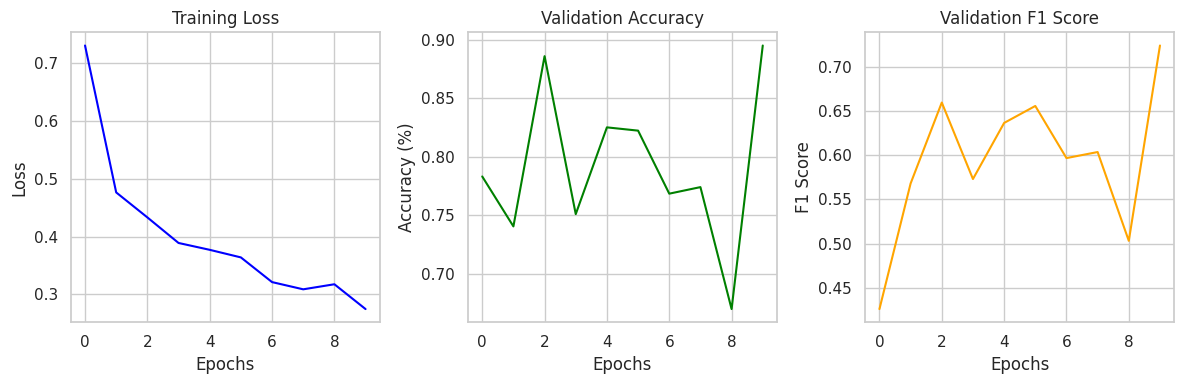

In [29]:
train_model(num_epochs=10)

🙏 **Thank You!**

If you found this notebook helpful or insightful, please consider upvoting!  
Your support motivates me to keep sharing meaningful content with the community.

Best of luck with your machine learning journey, and stay secure! 🌍ྀི
